# Aditya Modi

## Importing Dependencies

In [25]:
# importing all the necessary library and class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import adjusted_rand_score

## Uploading and Exploring Data

In [26]:
# uploading data from g-drive to create pandas df.
iris_df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [27]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


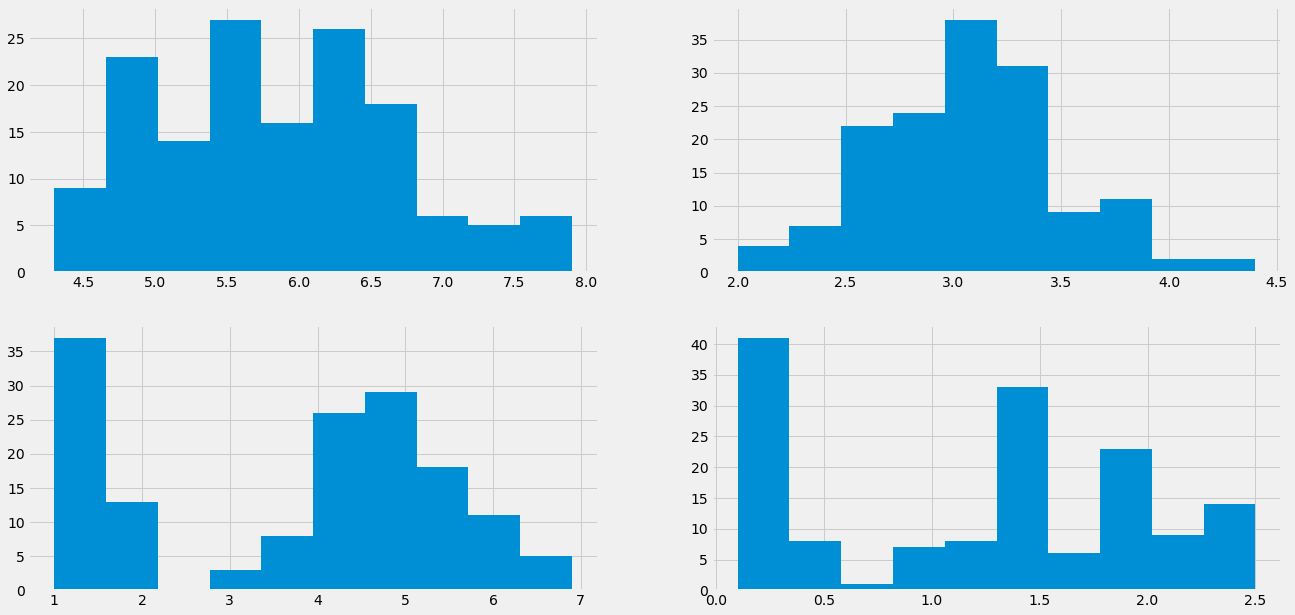

In [29]:
# visualizing the distribution of the all columns.
plt.figure(figsize = (20,10))

cols = iris_df.columns.to_list()
cols.remove('Id')
cols.remove('Species')

plt.style.use("fivethirtyeight")
for i,j in zip(range(1,5),cols):
  plt.subplot(2,2,i)
  plt.hist(iris_df[j])
  




## Data Preprocessing

In [30]:
# separating features and true_labels into X and Y
X = iris_df.iloc[:,[1,2,3,4]]
Y = iris_df.iloc[:,5]

In [31]:
# converting Y into 'int' format
Y = LabelEncoder().fit_transform(Y.astype('str'))
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
# standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features[:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

## Training and Evaluating

### Elbow Technique
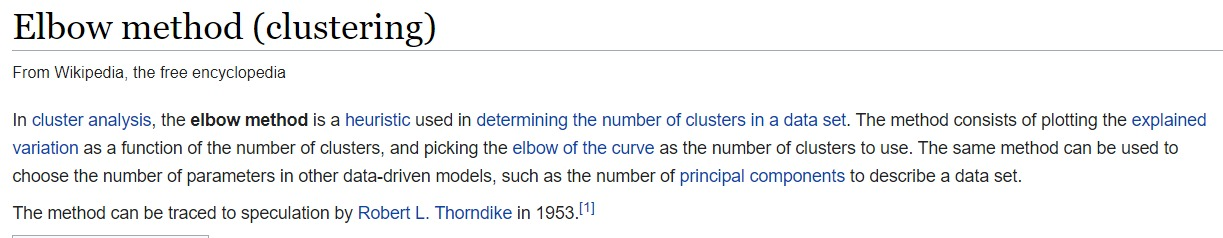



In [33]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

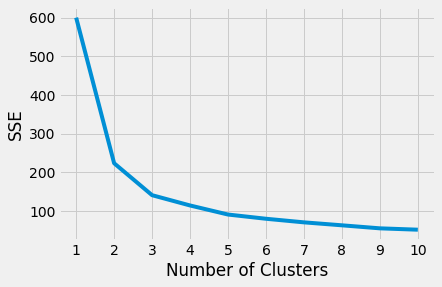

In [34]:
# visualizing the sse for various k
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [35]:
kl = KneeLocator(range(1,11),sse,curve = 'convex', direction= 'decreasing')

In [36]:
kl.elbow

3

### Silhoutte Technique

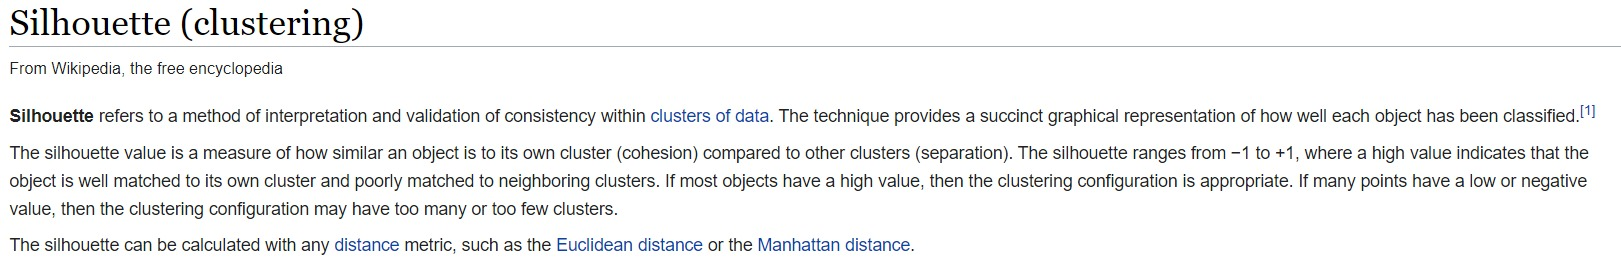

In [37]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

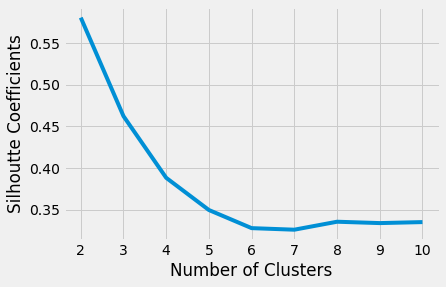

In [38]:
# visualizing the silhouette coefficients
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficients")
plt.show()

We can see that elbow method and silhouette method contradict each other. Acoording to elbow method **3** is the optimum number of clusters. But according to silhouette method **2** is the optimum number of clusters. If, you will look at the working of both technique in etail then you will found that this must be happening because **2 clusters** overlapp each other and don't have clear separation.

Let's visualize the cluster for k = 2 and k = 3

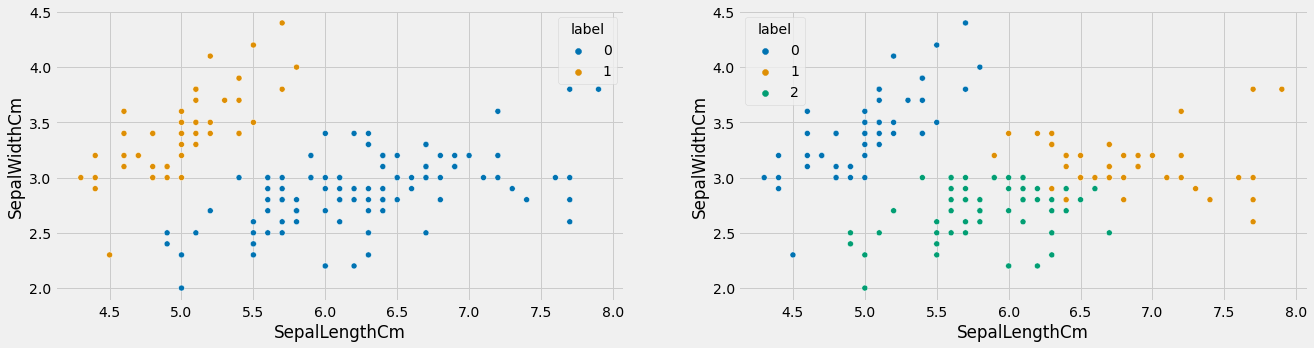

In [39]:
# visualizing the clusters on the basis of sepal features.
plt.figure(figsize=(20,5))

for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    iris_df['label'] = kmeans.labels_
    plt.subplot(1,2,k-1)
    sns.scatterplot(x= 'SepalLengthCm',y='SepalWidthCm',hue='label',palette='colorblind',data=iris_df)
    

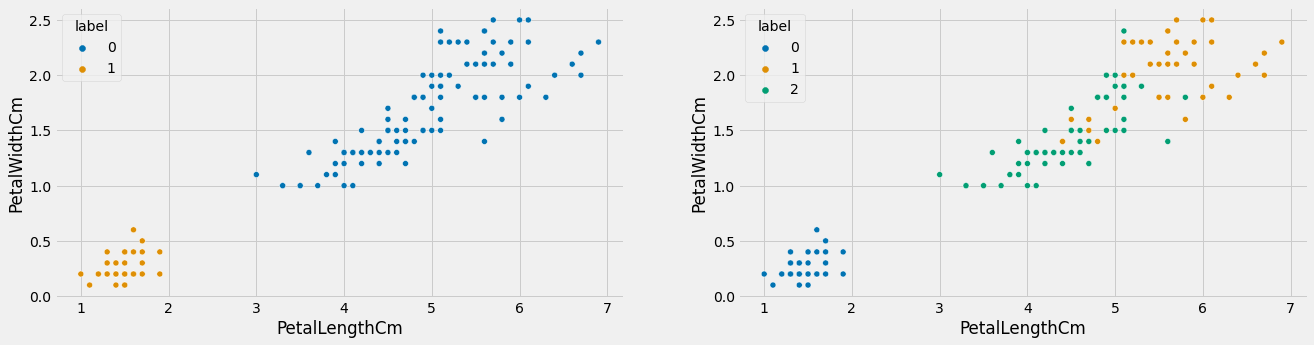

In [40]:
# visualizing the cluster on the basis of petal features.
plt.figure(figsize=(20,5))

for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    iris_df['label'] = kmeans.labels_
    plt.subplot(1,2,k-1)
    sns.scatterplot(x= 'PetalLengthCm',y='PetalWidthCm',hue='label',palette='colorblind',data=iris_df)

In [41]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [42]:
# creating table to compare the predicted bel with the true label
cluster_df = pd.crosstab(iris_df['label'],iris_df['Species'])
cluster_df

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,11,33
2,0,39,17


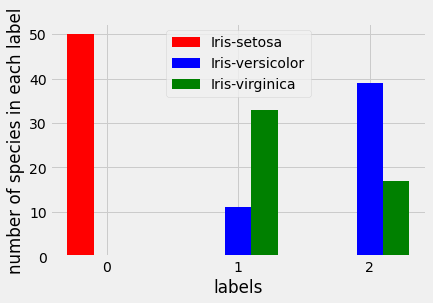

In [43]:
# viulizing the predicted label vs true label.
x = np.arange(3)
width = 0.2

plt.bar(x-0.2,cluster_df['Iris-setosa'],width,color = 'red')
plt.bar(x,cluster_df['Iris-versicolor'],width,color = 'blue')
plt.bar(x+0.2,cluster_df['Iris-virginica'],width,color = 'green')
plt.xticks(x,['0','1','2'])
plt.xlabel('labels')
plt.ylabel('number of species in each label')
plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'])

## Evaluation of Model

In [46]:
# final evaluation for k = 3 by using the adjusted_rand_score method.
iris_df['Species']= LabelEncoder().fit_transform(iris_df['Species'])
adr_kmeans = adjusted_rand_score(iris_df['Species'],iris_df['label'])
adr_kmeans

0.5923326221845838

## Conclusion


1.   We have trained the model by using the K-Means Clustering Algorithm and k = 3.

2.   This clustering model is little inefficient because two species i.e., versicolor and verginia overlapp each other and tend to have similar features

3.   Although, silhouette coefficient suits best for k = 2, but we have chose k = 3 because in reality there are three species. 

4. The adjusted_rand_score of the model is 0.592